In [5]:
# import heart.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the csv file
df = pd.read_csv('heart.csv')

# Print the first 5 rows of the dataframe.
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


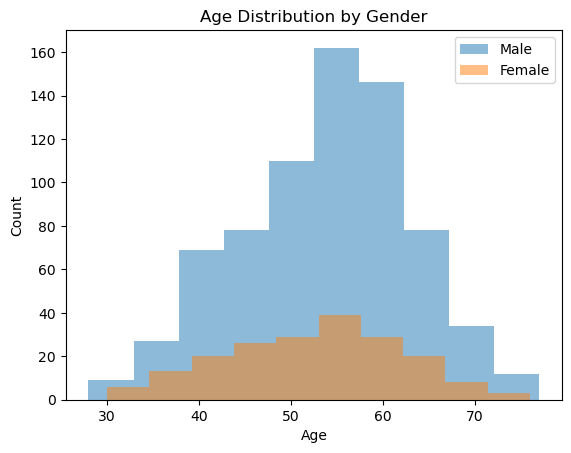

In [6]:
male_data = df[df['Sex'] == 'M']
female_data = df[df['Sex'] == 'F']

plt.hist(male_data['Age'], bins=10, alpha=0.5, label='Male')
plt.hist(female_data['Age'], bins=10, alpha=0.5, label='Female')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Gender')
plt.legend(loc='upper right')

plt.show()

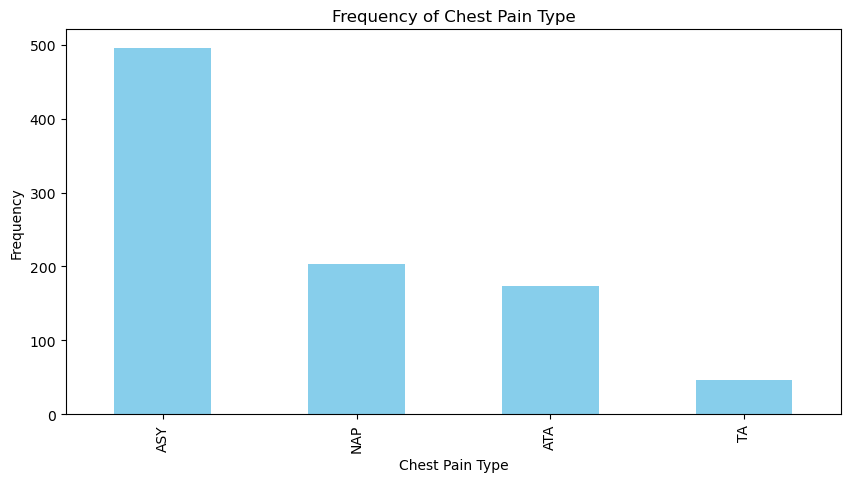

In [7]:
# Plot the categories of chest pain and the frequency of each.
chest_pain_counts = df['ChestPainType'].value_counts()

plt.figure(figsize=(10, 5))
chest_pain_counts.plot(kind='bar', color='skyblue')

plt.title('Frequency of Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')

plt.show()

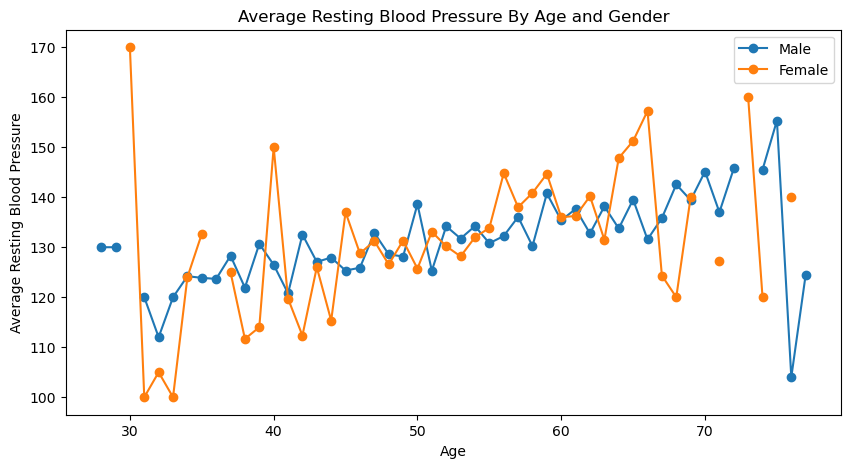

In [8]:
# Plot average blood pressure for each age divided into gender
average_blood_pressure = df.groupby(['Age', 'Sex'])['RestingBP'].mean().unstack()

plt.figure(figsize=(10, 5))
average_blood_pressure['M'].plot(label='Male', marker='o')
average_blood_pressure['F'].plot(label='Female', marker='o')

plt.title('Average Resting Blood Pressure By Age and Gender')
plt.xlabel('Age')
plt.ylabel('Average Resting Blood Pressure')
plt.legend()

plt.show()